# Predicting Price of House using KNearestNeighbour Regressor

In [1]:
#Use pandas to get some insights into the data (10 marks)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:\\Users\\Vimalraj\\Downloads\\house_rental_data.csv", index_col = 0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [8]:
df = df.dropna()

In [ ]:
#Show some interesting visualization of the data

Text(0.5, 1.0, 'Distribution Price')

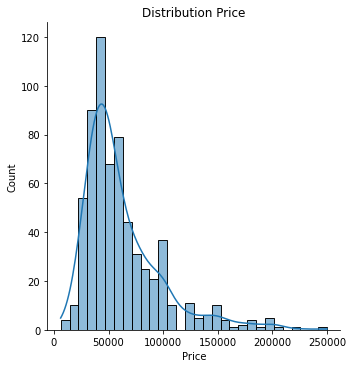

In [17]:
sns.displot(df["Price"],kde="True")
plt.title("Distribution Price")

<AxesSubplot:>

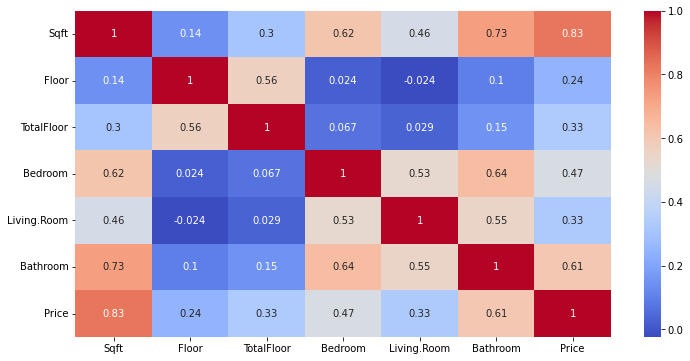

In [18]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")

Text(0.5, 1.0, 'Distribution of Prices with Number of Floors')

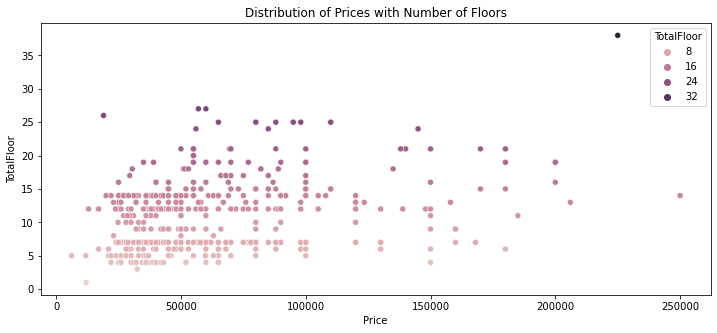

In [25]:
plt.figure(figsize=(12,5))
sns.scatterplot(y="TotalFloor", x="Price", data=df, hue="TotalFloor")
plt.title("Distribution of Prices with Number of Floors")

<AxesSubplot:xlabel='Bathroom', ylabel='Count'>

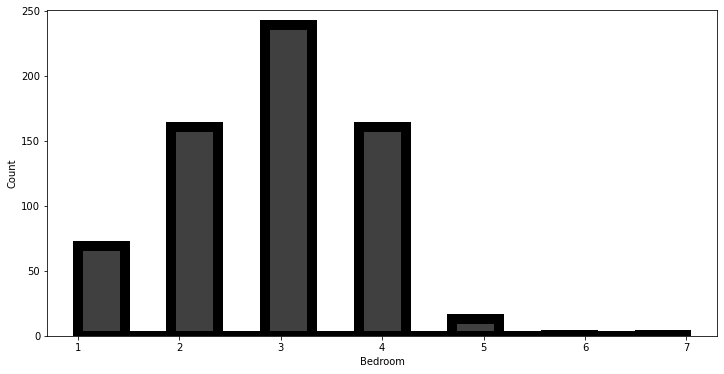

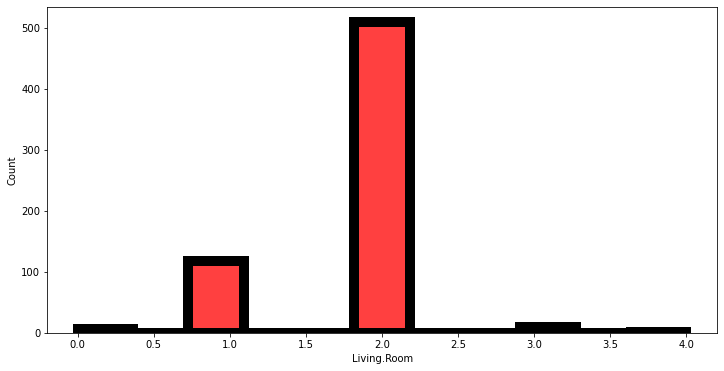

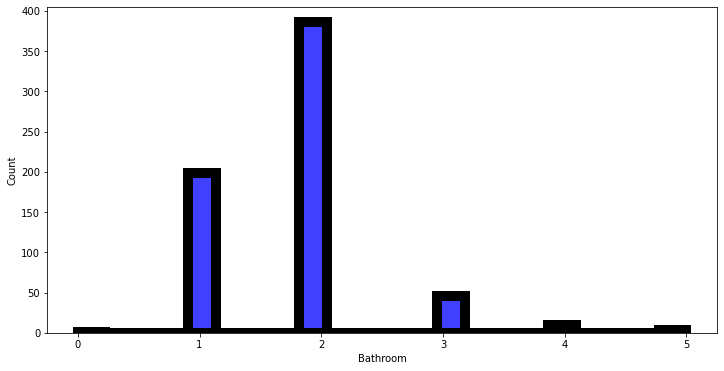

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Bedroom"], color="black", linewidth=10)
plt.figure(figsize=(12, 6))
sns.histplot(df["Living.Room"], color="red", linewidth=10)
plt.figure(figsize=(12, 6))
sns.histplot(df["Bathroom"], color="blue", linewidth=10)

In [ ]:
#Manage data for training & testing

In [9]:
X = df.drop('Price', axis=1)
y = df['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [13]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
#Finding a better value of k (10)

In [14]:
y_pred = knn_model.predict(X_test_scaled)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 516223023.48837215
R-squared Score: 0.6402511382539846


# Cluster similar Houses

In [28]:
df=pd.read_csv("C:\\Users\\Vimalraj\\Downloads\\house_rental_data.csv", index_col = 0)

In [29]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [56]:
#Data cleaning & getting rid of irrelevant information before clustering
df= df[df.Sqft < 4500]
df.reset_index(drop=True, inplace=True)

In [57]:
X = df
y = df['Price']

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Price'] = le.fit_transform(X['Price'])
y = le.transform(y)

In [60]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 641 samples were correctly labeled.
Accuracy score: 0.00
